#Introduction to Customer Segmentation using K-Means Clustering





##Overview of K-Means Clustering
K-Means clustering is one of the most popular and straightforward unsupervised learning algorithms. At its core, the algorithm partitions a dataset into a specified number (K) of clusters. The fundamental idea is to define K centroids, one for each cluster. These centroids are placed strategically, typically as far away from each other as possible, to start the clustering process. The next step involves assigning each data point to the nearest centroid. After all points are assigned, the positions of the K centroids are recalculated, and the assignment process repeats. This process continues iteratively until the centroids no longer move significantly, indicating that the clusters are as defined as they can be given the current data.

The K-Means algorithm is particularly useful in scenarios where we need to identify distinct groups in the data without any pre-existing labels – a common case in many real-world applications. Its simplicity and efficiency make K-Means a go-to method for quick and insightful data analysis.

##The Dataset and Its Relevance
For our project, we will be using a customer segmentation dataset. This dataset typically contains various customer attributes which can include demographics, past purchasing behavior, interaction history, preferences, and other significant features. Customer segmentation is a pivotal part of modern business strategies, especially in marketing, sales, and customer service. By clustering customers into distinct groups, businesses can tailor their strategies to address the specific needs and preferences of each segment, leading to more effective marketing, improved customer satisfaction, and increased sales

##Potential Applications of Customer Segmentation
Targeted Marketing: By understanding the characteristics of each segment, businesses can create more effective marketing campaigns that are tailored to the specific needs and preferences of each group.
Product Development: Insights from customer segmentation can guide product development to meet the specific requirements of different customer groups.
Customer Service Optimization: Tailoring customer service approaches to different segments can significantly improve customer satisfaction and loyalty.
Strategic Decision Making: Insights from customer data can inform broader business strategies, including market positioning and competitive strategy.

###1. Load the Dataset
This first code block is responsible for importing necessary libraries and loading the dataset. The dataset is loaded with specific encoding to handle any special characters.

In [16]:
import pandas as pd

# Load the dataset with ISO-8859-1 encoding
file_path = 'data.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

###2. Data Preprocessing
This block handles the preprocessing of the dataset. It includes dropping unnecessary columns and converting date-time information into a more usable format. Extracting features like the month and day of the week from the 'InvoiceDate' column can provide useful insights for the clustering process.

In [17]:
# Drop unnecessary columns
df.drop(['StockCode', 'InvoiceNo', 'Description'], axis=1, inplace=True)

# Convert 'InvoiceDate' to datetime and extract features
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceDayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df.drop('InvoiceDate', axis=1, inplace=True)

### 3. Data Sampling
To manage large datasets and avoid memory issues, this step involves sampling a subset of the data. It helps in efficiently running the K-Means algorithm on a representative sample.

In [18]:
# Sample the data to avoid memory issues
df_sample = df.sample(n=5000, random_state=42)

### 4. Categorical Data Encoding and Missing Value Imputation
Categorical data is transformed into a numerical format using one-hot encoding. Additionally, any missing values in the dataset are imputed to ensure the dataset is complete and suitable for clustering.

In [19]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Identify and process categorical columns
categorical_cols = df_sample.select_dtypes(include=['object']).columns
df_sample = pd.get_dummies(df_sample, columns=categorical_cols)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df_sample_imputed = pd.DataFrame(imputer.fit_transform(df_sample), columns=df_sample.columns)

### 5. Feature Scaling
This step scales the numeric features using standard scaling, which is a common requirement for many machine learning algorithms, including K-Means clustering.

In [20]:
# Scale numeric columns
scaler = StandardScaler()
numeric_cols = df_sample_imputed.select_dtypes(include=['number']).columns
df_sample_imputed[numeric_cols] = scaler.fit_transform(df_sample_imputed[numeric_cols])

### 6. Applying K-Means Clustering
First, the optimal number of clusters is determined using the Elbow method. Then, K-Means clustering is applied to the dataset.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

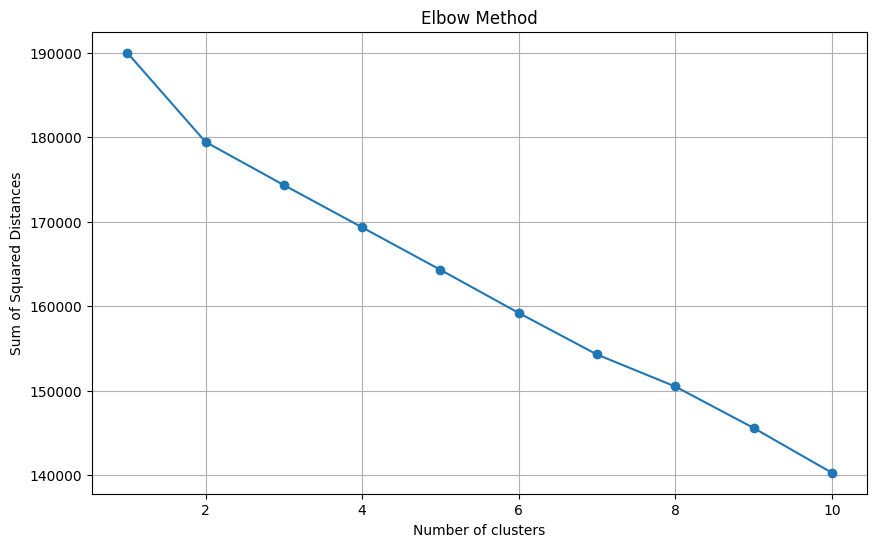

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow method
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_sample_imputed)
    ssd.append(kmeans.inertia_)

# Plotting the SSD for each k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), ssd, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.grid(True)
plt.show()

### 7. Cluster Label Assignment and Analysis
This code assigns the data points to the clusters and then performs an analysis to understand the characteristics of each cluster.

In [22]:
# Assuming the elbow is found at 3 clusters (this might need adjustment)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(df_sample_imputed)

# Add the cluster labels to the DataFrame
df_sample_imputed['Cluster'] = cluster_labels

# Analyze the clusters
cluster_analysis = df_sample_imputed.groupby('Cluster').mean()
cluster_analysis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Quantity,UnitPrice,CustomerID,InvoiceMonth,InvoiceDayOfWeek,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,Country_Canada,...,Country_Portugal,Country_RSA,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
Cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.012178,-0.004617,0.140846,0.000888,0.001545,-0.044766,-0.028296,-0.014144,-0.066479,-0.014144,...,-0.052989,-0.014144,-0.020004,-0.080257,-0.037443,-0.060108,-0.028296,-0.014144,0.320592,-0.037443
1,0.059420,0.259322,-1.737814,-0.010867,0.066589,-0.044766,-0.028296,-0.014144,-0.066479,-0.014144,...,-0.052989,-0.014144,-0.020004,-0.080257,-0.037443,-0.060108,-0.028296,-0.014144,-3.111874,-0.037443
2,0.133618,-0.011419,-1.269966,-0.008026,-0.036388,0.560182,0.354077,0.176986,0.831885,0.176986,...,0.663082,0.176986,0.250320,1.004300,0.468541,0.752166,0.354077,0.176986,-3.111874,0.468541


### 8. Generating Plots for Cluster Analysis
This final block of code generates plots to visually analyze the distribution of different features across the clusters. Replace 'Feature1', 'Feature2', ... with the actual numeric features from your dataset.

<ipython-input-28-fa781e27d3c4>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(2, 2, i+1)


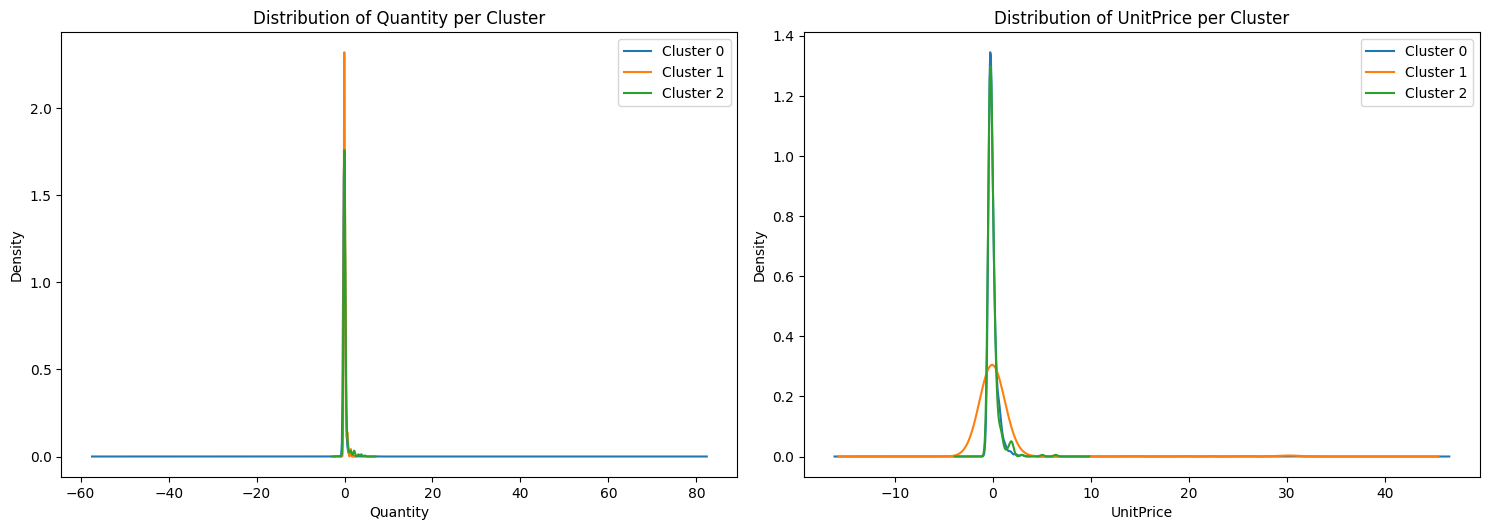

In [28]:
# Distribution of features per cluster
fig, axs = plt.subplots(1, 1, figsize=(15, 10))

# Use 'Quantity' and 'UnitPrice' as example features
features_to_plot = ['Quantity', 'UnitPrice']  # Replace with actual numeric features

for i, feature in enumerate(features_to_plot):
    ax = plt.subplot(2, 2, i+1)
    for cluster in range(optimal_clusters):
        df_sample_imputed[df_sample_imputed['Cluster'] == cluster][feature].plot(kind='kde', ax=ax, label=f'Cluster {cluster}')
    plt.title(f'Distribution of {feature} per Cluster')
    plt.xlabel(feature)
    plt.legend()

plt.tight_layout()
plt.show()